In [1]:
import pandas as pd  
import numpy as np  
import tensorflow as tf  
from sklearn.metrics import explained_variance_score, mean_absolute_error, median_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
# read in the csv data into a pandas data frame and set the date as the index
df = pd.read_csv('end-part2_df.csv').set_index('date')

# execute the describe() function and transpose the output so that it doesn't overflow the width of the screen
df.describe().T

,count,mean,std,min,25%,50%,75%,max
meantempm,997.0,13.129388,10.971591,-17.0,5.0,15.0,22.00,32.00
maxtempm,997.0,19.509529,11.577275,-12.0,11.0,22.0,29.00,38.00
mintempm,997.0,6.438315,10.957267,-27.0,-2.0,7.0,16.00,26.00
meantempm_1,997.0,13.109328,10.984613,-17.0,5.0,15.0,22.00,32.00
meantempm_2,997.0,13.088265,11.001106,-17.0,5.0,14.0,22.00,32.00
meantempm_3,997.0,13.066199,11.017312,-17.0,5.0,14.0,22.00,32.00
meandewptm_1,997.0,6.440321,10.596265,-22.0,-2.0,7.0,16.00,24.00
meandewptm_2,997.0,6.420261,10.606550,-22.0,-2.0,7.0,16.00,24.00
meandewptm_3,997.0,6.393180,10.619083,-22.0,-2.0,7.0,16.00,24.00
meanpressurem_1,997.0,1016.139418,7.582453,989.0,1011.0,1016.0,1021.00,1040.00


In [3]:
df.describe()

,meantempm,maxtempm,mintempm,meantempm_1,meantempm_2,meantempm_3,meandewptm_1,meandewptm_2,meandewptm_3,meanpressurem_1,...,mindewptm_3,maxpressurem_1,maxpressurem_2,maxpressurem_3,minpressurem_1,minpressurem_2,minpressurem_3,precipm_1,precipm_2,precipm_3
count,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,...,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000,997.000000
mean,13.129388,19.509529,6.438315,13.109328,13.088265,13.066199,6.440321,6.420261,6.393180,1016.139418,...,3.198596,1019.913741,1019.917753,1019.927783,1012.317954,1012.319960,1012.326981,2.593180,2.593180,2.573049
std,10.971591,11.577275,10.957267,10.984613,11.001106,11.017312,10.596265,10.606550,10.619083,7.582453,...,11.251536,7.755590,7.757705,7.757805,7.885743,7.886681,7.889511,8.428058,8.428058,8.410223
min,-17.000000,-12.000000,-27.000000,-17.000000,-17.000000,-17.000000,-22.000000,-22.000000,-22.000000,989.000000,...,-28.000000,993.000000,993.000000,993.000000,956.000000,956.000000,956.000000,0.000000,0.000000,0.000000
25%,5.000000,11.000000,-2.000000,5.000000,5.000000,5.000000,-2.000000,-2.000000,-2.000000,1011.000000,...,-6.000000,1015.000000,1015.000000,1015.000000,1008.000000,1008.000000,1008.000000,0.000000,0.000000,0.000000
50%,15.000000,22.000000,7.000000,15.000000,14.000000,14.000000,7.000000,7.000000,7.000000,1016.000000,...,4.000000,1019.000000,1019.000000,1019.000000,1012.000000,1012.000000,1012.000000,0.000000,0.000000,0.000000
75%,22.000000,29.000000,16.000000,22.000000,22.000000,22.000000,16.000000,16.000000,16.000000,1021.000000,...,13.000000,1024.000000,1024.000000,1024.000000,1017.000000,1017.000000,1017.000000,0.250000,0.250000,0.250000
max,32.000000,38.000000,26.000000,32.000000,32.000000,32.000000,24.000000,24.000000,24.000000,1040.000000,...,22.000000,1055.000000,1055.000000,1055.000000,1035.000000,1035.000000,1035.000000,95.760000,95.760000,95.760000


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
meantempm,997.0,13.129388,10.971591,-17.0,5.0,15.0,22.00,32.00
maxtempm,997.0,19.509529,11.577275,-12.0,11.0,22.0,29.00,38.00
mintempm,997.0,6.438315,10.957267,-27.0,-2.0,7.0,16.00,26.00
meantempm_1,997.0,13.109328,10.984613,-17.0,5.0,15.0,22.00,32.00
meantempm_2,997.0,13.088265,11.001106,-17.0,5.0,14.0,22.00,32.00
meantempm_3,997.0,13.066199,11.017312,-17.0,5.0,14.0,22.00,32.00
meandewptm_1,997.0,6.440321,10.596265,-22.0,-2.0,7.0,16.00,24.00
meandewptm_2,997.0,6.420261,10.606550,-22.0,-2.0,7.0,16.00,24.00
meandewptm_3,997.0,6.393180,10.619083,-22.0,-2.0,7.0,16.00,24.00
meanpressurem_1,997.0,1016.139418,7.582453,989.0,1011.0,1016.0,1021.00,1040.00


In [5]:
# execute the info() function
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 997 entries, 2015-01-04 to 2017-09-27
Data columns (total 39 columns):
meantempm          997 non-null int64
maxtempm           997 non-null int64
mintempm           997 non-null int64
meantempm_1        997 non-null float64
meantempm_2        997 non-null float64
meantempm_3        997 non-null float64
meandewptm_1       997 non-null float64
meandewptm_2       997 non-null float64
meandewptm_3       997 non-null float64
meanpressurem_1    997 non-null float64
meanpressurem_2    997 non-null float64
meanpressurem_3    997 non-null float64
maxhumidity_1      997 non-null float64
maxhumidity_2      997 non-null float64
maxhumidity_3      997 non-null float64
minhumidity_1      997 non-null float64
minhumidity_2      997 non-null float64
minhumidity_3      997 non-null float64
maxtempm_1         997 non-null float64
maxtempm_2         997 non-null float64
maxtempm_3         997 non-null float64
mintempm_1         997 non-null float64
mintempm_2

In [6]:
# First drop the maxtempm and mintempm from the dataframe
df = df.drop(['mintempm', 'maxtempm'], axis=1)

# X will be a pandas dataframe of all columns except meantempm
X = df[[col for col in df.columns if col != 'meantempm']]

# y will be a pandas series of the meantempm
y = df['meantempm']  

In [7]:
X

,meantempm_1,meantempm_2,meantempm_3,meandewptm_1,meandewptm_2,meandewptm_3,meanpressurem_1,meanpressurem_2,meanpressurem_3,maxhumidity_1,...,mindewptm_3,maxpressurem_1,maxpressurem_2,maxpressurem_3,minpressurem_1,minpressurem_2,minpressurem_3,precipm_1,precipm_2,precipm_3
date,,,,,,,,,,,,,,,,,,,,,
2015-01-04,-4.0,-6.0,-6.0,-11.0,-9.0,-12.0,1016.0,1022.0,1023.0,92.0,...,-18.0,1025.0,1026.0,1025.0,1010.0,1017.0,1019.0,0.76,0.00,0.00
2015-01-05,-14.0,-4.0,-6.0,-19.0,-11.0,-9.0,1033.0,1016.0,1022.0,80.0,...,-13.0,1043.0,1025.0,1026.0,1023.0,1010.0,1017.0,0.25,0.76,0.00
2015-01-06,-9.0,-14.0,-4.0,-14.0,-19.0,-11.0,1032.0,1033.0,1016.0,80.0,...,-16.0,1043.0,1043.0,1025.0,1023.0,1023.0,1010.0,0.00,0.25,0.76
2015-01-07,-10.0,-9.0,-14.0,-15.0,-14.0,-19.0,1036.0,1032.0,1033.0,80.0,...,-23.0,1043.0,1043.0,1043.0,1027.0,1023.0,1023.0,0.00,0.00,0.25
2015-01-08,-16.0,-10.0,-9.0,-22.0,-15.0,-14.0,1035.0,1036.0,1032.0,72.0,...,-17.0,1055.0,1043.0,1043.0,956.0,1027.0,1023.0,0.00,0.00,0.00
2015-01-09,-7.0,-16.0,-10.0,-12.0,-22.0,-15.0,1024.0,1035.0,1036.0,69.0,...,-18.0,1037.0,1055.0,1043.0,1014.0,956.0,1027.0,0.00,0.00,0.00
2015-01-10,-11.0,-7.0,-16.0,-19.0,-12.0,-22.0,1035.0,1024.0,1035.0,69.0,...,-24.0,1039.0,1037.0,1055.0,1030.0,1014.0,956.0,0.00,0.00,0.00
2015-01-11,-6.0,-11.0,-7.0,-12.0,-19.0,-12.0,1023.0,1035.0,1024.0,79.0,...,-21.0,1031.0,1039.0,1037.0,1019.0,1030.0,1014.0,0.00,0.00,0.00
2015-01-12,-5.0,-6.0,-11.0,-11.0,-12.0,-19.0,1024.0,1023.0,1035.0,96.0,...,-21.0,1031.0,1031.0,1039.0,1021.0,1019.0,1030.0,0.00,0.00,0.00


In [8]:
# split data into training set and a temporary set using sklearn.model_selection.traing_test_split
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.2, random_state=23)  

In [9]:
# take the remaining 20% of data in X_tmp, y_tmp and split them evenly
X_test, X_val, y_test, y_val = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=23)

X_train.shape, X_test.shape, X_val.shape  
print("Training instances   {}, Training features   {}".format(X_train.shape[0], X_train.shape[1]))  
print("Validation instances {}, Validation features {}".format(X_val.shape[0], X_val.shape[1]))  
print("Testing instances    {}, Testing features    {}".format(X_test.shape[0], X_test.shape[1]))  

Training instances   797, Training features   36
Validation instances 100, Validation features 36
Testing instances    100, Testing features    36


In [10]:
feature_cols = [tf.feature_column.numeric_column(col) for col in X.columns]  

In [11]:
regressor = tf.estimator.DNNRegressor(feature_columns=feature_cols,  
                                      hidden_units=[50, 50],
                                      model_dir='tf_wx_model')

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'tf_wx_model', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x000002860680D5C0>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [12]:
def wx_input_fn(X, y=None, num_epochs=None, shuffle=True, batch_size=400):  
    return tf.estimator.inputs.pandas_input_fn(x=X,
                                               y=y,
                                               num_epochs=num_epochs,
                                               shuffle=shuffle,
                                               batch_size=batch_size)

In [13]:
evaluations = []  
STEPS = 400  
for i in range(100):  
    regressor.train(input_fn=wx_input_fn(X_train, y=y_train), steps=STEPS)
    evaluations.append(regressor.evaluate(input_fn=wx_input_fn(X_val,
                                                               y_val,
                                                               num_epochs=1,
                                                               shuffle=False)))

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 58768.3, step = 1
INFO:tensorflow:global_step/sec: 62.4055
INFO:tensorflow:loss = 11380.6, step = 101 (1.602 sec)
INFO:tensorflow:global_step/sec: 67.9823
INFO:tensorflow:loss = 8710.69, step = 201 (1.487 sec)
INFO:tensorflow:global_step/sec: 65.1236
INFO:tensorflow:loss = 8700.92, step = 301 (1.539 sec)
INFO:tensorflow:Saving checkpoints for 400 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 7761.3.
INFO:tensorflow:Starting evaluation at 2018-03-09-11:51:52
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-400
INFO:tensorflow:Finished evaluation at 2018-03-09-11:51:53
INFO:tensorflow:Saving dict for global step 400: average_loss = 17.1875, global_step = 400, loss = 1718.75
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-400
INFO:tensorflow:Saving checkpoint

INFO:tensorflow:Saving dict for global step 3600: average_loss = 11.6401, global_step = 3600, loss = 1164.01
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-3600
INFO:tensorflow:Saving checkpoints for 3601 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 6123.55, step = 3601
INFO:tensorflow:global_step/sec: 63.7119
INFO:tensorflow:loss = 5602.12, step = 3701 (1.570 sec)
INFO:tensorflow:global_step/sec: 65.9115
INFO:tensorflow:loss = 5423.4, step = 3801 (1.517 sec)
INFO:tensorflow:global_step/sec: 66.6101
INFO:tensorflow:loss = 5780.98, step = 3901 (1.501 sec)
INFO:tensorflow:Saving checkpoints for 4000 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 5866.5.
INFO:tensorflow:Starting evaluation at 2018-03-09-11:53:50
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-4000
INFO:tensorflow:Finished evaluation at 2018-03-09-11:53:51
INFO:tensorflow:Saving dict for global step 4000: average_loss =

INFO:tensorflow:Loss for final step: 5671.53.
INFO:tensorflow:Starting evaluation at 2018-03-09-11:55:33
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-7200
INFO:tensorflow:Finished evaluation at 2018-03-09-11:55:33
INFO:tensorflow:Saving dict for global step 7200: average_loss = 11.0385, global_step = 7200, loss = 1103.85
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-7200
INFO:tensorflow:Saving checkpoints for 7201 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 5061.91, step = 7201
INFO:tensorflow:global_step/sec: 62.9996
INFO:tensorflow:loss = 5723.26, step = 7301 (1.587 sec)
INFO:tensorflow:global_step/sec: 68.2651
INFO:tensorflow:loss = 5999.84, step = 7401 (1.469 sec)
INFO:tensorflow:global_step/sec: 68.1581
INFO:tensorflow:loss = 6244.64, step = 7501 (1.531 sec)
INFO:tensorflow:Saving checkpoints for 7600 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 4585.31.
INFO:tensorflow:

INFO:tensorflow:loss = 5317.19, step = 10601 (1.933 sec)
INFO:tensorflow:global_step/sec: 49.582
INFO:tensorflow:loss = 5592.86, step = 10701 (2.032 sec)
INFO:tensorflow:Saving checkpoints for 10800 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 5405.13.
INFO:tensorflow:Starting evaluation at 2018-03-09-11:57:30
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-10800
INFO:tensorflow:Finished evaluation at 2018-03-09-11:57:30
INFO:tensorflow:Saving dict for global step 10800: average_loss = 10.7872, global_step = 10800, loss = 1078.72
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-10800
INFO:tensorflow:Saving checkpoints for 10801 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 5542.2, step = 10801
INFO:tensorflow:global_step/sec: 63.8828
INFO:tensorflow:loss = 5310.22, step = 10901 (1.565 sec)
INFO:tensorflow:global_step/sec: 69.4039
INFO:tensorflow:loss = 5140.54, step = 11001 (1.441 se

INFO:tensorflow:Saving checkpoints for 14001 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 5122.63, step = 14001
INFO:tensorflow:global_step/sec: 64.5367
INFO:tensorflow:loss = 4993.39, step = 14101 (1.534 sec)
INFO:tensorflow:global_step/sec: 66.6117
INFO:tensorflow:loss = 5426.38, step = 14201 (1.501 sec)
INFO:tensorflow:global_step/sec: 68.675
INFO:tensorflow:loss = 5532.45, step = 14301 (1.456 sec)
INFO:tensorflow:Saving checkpoints for 14400 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 4950.8.
INFO:tensorflow:Starting evaluation at 2018-03-09-11:59:36
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-14400
INFO:tensorflow:Finished evaluation at 2018-03-09-11:59:36
INFO:tensorflow:Saving dict for global step 14400: average_loss = 10.6853, global_step = 14400, loss = 1068.53
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-14400
INFO:tensorflow:Saving checkpoints for 14401 into tf_w

INFO:tensorflow:Finished evaluation at 2018-03-09-12:01:28
INFO:tensorflow:Saving dict for global step 17600: average_loss = 10.6173, global_step = 17600, loss = 1061.73
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-17600
INFO:tensorflow:Saving checkpoints for 17601 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 5613.62, step = 17601
INFO:tensorflow:global_step/sec: 64.3762
INFO:tensorflow:loss = 5036.18, step = 17701 (1.538 sec)
INFO:tensorflow:global_step/sec: 67.6289
INFO:tensorflow:loss = 6015.16, step = 17801 (1.479 sec)
INFO:tensorflow:global_step/sec: 67.2984
INFO:tensorflow:loss = 5357.61, step = 17901 (1.502 sec)
INFO:tensorflow:Saving checkpoints for 18000 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 5434.82.
INFO:tensorflow:Starting evaluation at 2018-03-09-12:01:40
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-18000
INFO:tensorflow:Finished evaluation at 2018-03-09-12

INFO:tensorflow:loss = 4794.91, step = 21101 (1.456 sec)
INFO:tensorflow:Saving checkpoints for 21200 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 5437.81.
INFO:tensorflow:Starting evaluation at 2018-03-09-12:03:33
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-21200
INFO:tensorflow:Finished evaluation at 2018-03-09-12:03:34
INFO:tensorflow:Saving dict for global step 21200: average_loss = 10.5768, global_step = 21200, loss = 1057.68
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-21200
INFO:tensorflow:Saving checkpoints for 21201 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 4799.99, step = 21201
INFO:tensorflow:global_step/sec: 63.8038
INFO:tensorflow:loss = 5081.23, step = 21301 (1.556 sec)
INFO:tensorflow:global_step/sec: 68.0711
INFO:tensorflow:loss = 5256.62, step = 21401 (1.465 sec)
INFO:tensorflow:global_step/sec: 68.0017
INFO:tensorflow:loss = 5032.09, step = 21501 (1.471 

INFO:tensorflow:loss = 5676.93, step = 24401
INFO:tensorflow:global_step/sec: 53.8843
INFO:tensorflow:loss = 4942.11, step = 24501 (1.856 sec)
INFO:tensorflow:global_step/sec: 65.8822
INFO:tensorflow:loss = 5290.45, step = 24601 (1.518 sec)
INFO:tensorflow:global_step/sec: 67.2147
INFO:tensorflow:loss = 5103.21, step = 24701 (1.503 sec)
INFO:tensorflow:Saving checkpoints for 24800 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 5012.48.
INFO:tensorflow:Starting evaluation at 2018-03-09-12:05:31
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-24800
INFO:tensorflow:Finished evaluation at 2018-03-09-12:05:31
INFO:tensorflow:Saving dict for global step 24800: average_loss = 10.5444, global_step = 24800, loss = 1054.44
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-24800
INFO:tensorflow:Saving checkpoints for 24801 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 5112.87, step = 24801
INFO:te

INFO:tensorflow:Saving dict for global step 28000: average_loss = 10.5156, global_step = 28000, loss = 1051.56
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-28000
INFO:tensorflow:Saving checkpoints for 28001 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 5053.11, step = 28001
INFO:tensorflow:global_step/sec: 65.1897
INFO:tensorflow:loss = 5138.21, step = 28101 (1.518 sec)
INFO:tensorflow:global_step/sec: 68.7761
INFO:tensorflow:loss = 5514.7, step = 28201 (1.470 sec)
INFO:tensorflow:global_step/sec: 68.2908
INFO:tensorflow:loss = 5436.39, step = 28301 (1.449 sec)
INFO:tensorflow:Saving checkpoints for 28400 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 5373.06.
INFO:tensorflow:Starting evaluation at 2018-03-09-12:07:40
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-28400
INFO:tensorflow:Finished evaluation at 2018-03-09-12:07:40
INFO:tensorflow:Saving dict for global step 28400: av

INFO:tensorflow:Saving checkpoints for 31600 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 5172.48.
INFO:tensorflow:Starting evaluation at 2018-03-09-12:09:32
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-31600
INFO:tensorflow:Finished evaluation at 2018-03-09-12:09:33
INFO:tensorflow:Saving dict for global step 31600: average_loss = 10.5272, global_step = 31600, loss = 1052.72
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-31600
INFO:tensorflow:Saving checkpoints for 31601 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 5125.44, step = 31601
INFO:tensorflow:global_step/sec: 64.029
INFO:tensorflow:loss = 5062.44, step = 31701 (1.562 sec)
INFO:tensorflow:global_step/sec: 67.3028
INFO:tensorflow:loss = 5078.53, step = 31801 (1.501 sec)
INFO:tensorflow:global_step/sec: 58.1998
INFO:tensorflow:loss = 4643.3, step = 31901 (1.723 sec)
INFO:tensorflow:Saving checkpoints for 32000 into tf_w

INFO:tensorflow:global_step/sec: 65.7845
INFO:tensorflow:loss = 4825.0, step = 34901 (1.535 sec)
INFO:tensorflow:global_step/sec: 69.0032
INFO:tensorflow:loss = 5357.03, step = 35001 (1.449 sec)
INFO:tensorflow:global_step/sec: 64.9807
INFO:tensorflow:loss = 5366.54, step = 35101 (1.523 sec)
INFO:tensorflow:Saving checkpoints for 35200 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 5107.93.
INFO:tensorflow:Starting evaluation at 2018-03-09-12:11:35
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-35200
INFO:tensorflow:Finished evaluation at 2018-03-09-12:11:36
INFO:tensorflow:Saving dict for global step 35200: average_loss = 10.4711, global_step = 35200, loss = 1047.11
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-35200
INFO:tensorflow:Saving checkpoints for 35201 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 5630.94, step = 35201
INFO:tensorflow:global_step/sec: 65.1469
INFO:tensorf

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-38400
INFO:tensorflow:Saving checkpoints for 38401 into tf_wx_model\model.ckpt.
INFO:tensorflow:loss = 5259.96, step = 38401
INFO:tensorflow:global_step/sec: 64.5589
INFO:tensorflow:loss = 4257.08, step = 38501 (1.567 sec)
INFO:tensorflow:global_step/sec: 68.0588
INFO:tensorflow:loss = 5578.96, step = 38601 (1.467 sec)
INFO:tensorflow:global_step/sec: 64.3971
INFO:tensorflow:loss = 5470.61, step = 38701 (1.541 sec)
INFO:tensorflow:Saving checkpoints for 38800 into tf_wx_model\model.ckpt.
INFO:tensorflow:Loss for final step: 5398.85.
INFO:tensorflow:Starting evaluation at 2018-03-09-12:13:30
INFO:tensorflow:Restoring parameters from tf_wx_model\model.ckpt-38800
INFO:tensorflow:Finished evaluation at 2018-03-09-12:13:31
INFO:tensorflow:Saving dict for global step 38800: average_loss = 10.4451, global_step = 38800, loss = 1044.51
INFO:tensorflow:Create CheckpointSaverHook.
INFO:ten

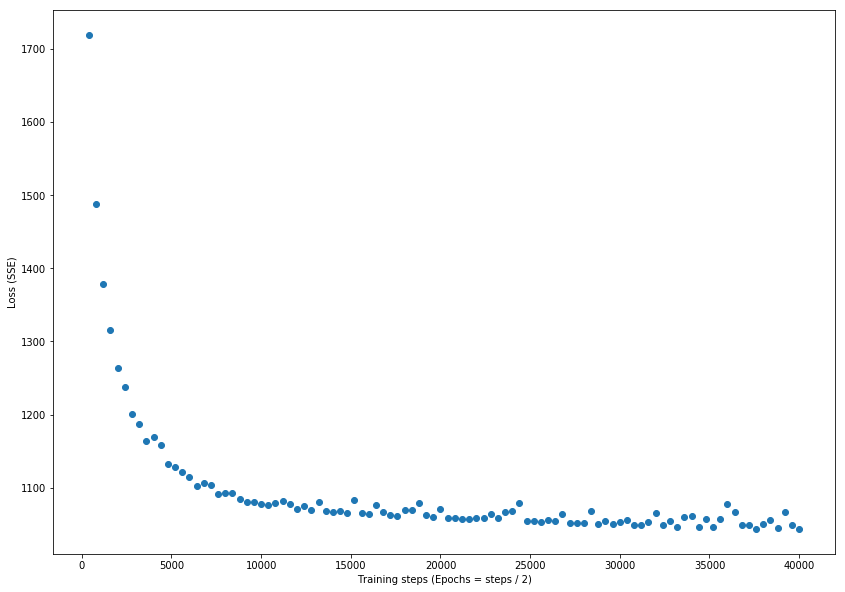

In [14]:
import matplotlib.pyplot as plt  
%matplotlib inline

# manually set the parameters of the figure to and appropriate size
plt.rcParams['figure.figsize'] = [14, 10]

loss_values = [ev['loss'] for ev in evaluations]  
training_steps = [ev['global_step'] for ev in evaluations]

plt.scatter(x=training_steps, y=loss_values)  
plt.xlabel('Training steps (Epochs = steps / 2)')  
plt.ylabel('Loss (SSE)')  
plt.show()